In [1]:
import numpy as np

def electric_field(t, r):
    """Uniform electric field"""
    return np.array([E0, 0.0, 0.0])

def magnetic_field(t, r):
    """Uniform magnetic field"""
    return np.array([0.0, 0.0, B0])


class Particle:
    def __init__(self, q, m, r0, v0):
        self.q = q
        self.m = m
        self.r = np.array(r0, dtype=float)
        self.v = np.array(v0, dtype=float)

    def acceleration(self, E, B):
        return (self.q / self.m) * (E + np.cross(self.v, B))

def velocity_verlet(particle, E_func, B_func, dt, t):
    E = E_func(t, particle.r)
    B = B_func(t, particle.r)

    a = particle.acceleration(E, B)
    particle.r += particle.v * dt + 0.5 * a * dt**2

    E_new = E_func(t + dt, particle.r)
    B_new = B_func(t + dt, particle.r)

    a_new = (particle.q / particle.m) * (E_new + np.cross(particle.v, B_new))
    particle.v += 0.5 * (a + a_new) * dt

def run_simulation(particle, dt, t_max):
    steps = int(t_max / dt)
    t = 0.0

    r_hist = np.zeros((steps, 3))
    v_hist = np.zeros((steps, 3))

    for i in range(steps):
        r_hist[i] = particle.r
        v_hist[i] = particle.v

        velocity_verlet(particle, electric_field, magnetic_field, dt, t)
        t += dt

    return r_hist, v_hist



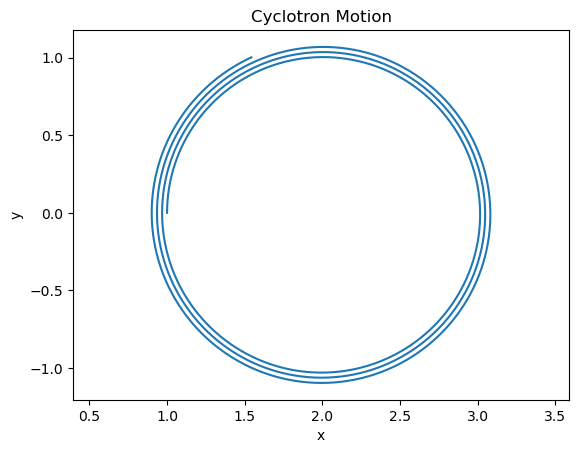

In [3]:
import matplotlib.pyplot as plt

# Physical constants (normalized units are OK)
q = 1.0
m = 1.0
global E0, B0
E0 = 0.0
B0 = 1.0

r0 = [1.0, 0.0, 0.0]
v0 = [0.0, 1.0, 0.0]

particle = Particle(q, m, r0, v0)

dt = 0.01
t_max = 20.0

r, v = run_simulation(particle, dt, t_max)

plt.plot(r[:,0], r[:,1])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Cyclotron Motion")
plt.axis("equal")
plt.show()
